In [1]:
__author__ = "Guillermo Damke <gdamke@gmail.com>"
__version__ = 20201218

# Optimization with LMFIT

"Mathematical optimization is the selection of a best element (with regard to some criterion) from some set of available alternatives. Optimization problems of sorts arise in all quantitative disciplines from computer science and engineering to operations research and economics, and the development of solution methods has been of interest in mathematics for centuries

In the simplest case, an optimization problem consists of maximizing or minimizing a real function by systematically choosing input values from within an allowed set and computing the value of the function. The generalization of optimization theory and techniques to other formulations constitutes a large area of applied mathematics. More generally, optimization includes finding "best available" values of some objective function given a defined domain (or input), including a variety of different types of objective functions and different types of domains." (quote from Wikipedia)

Generally, an optimization problem can be represented in the following way:

*Given:* a function $f : A → ℝ$ from some set $A$ to the real numbers

*Sought:* an element $x_0 ∈ A$ such that:

* $f(x0) ≤ f(x)$ for all $x ∈ A$ ("minimization")

or such that:

* $f(x0) ≥ f(x)$ for all $x ∈ A$ ("maximization").


In addition, since the following is valid:

$f(x_0) ≥ f(x) ⇔ f'(x0) ≤ f'(x)$

with $f'(x)=-f(x)$, $f': A → R$
    
it is usual to solve maximization problem as a minimization problem. 

## LMFIT: Non-Linear Least-Squares Minimization and Curve-Fitting for Python

For installation instructions, it is better to visit its website:

https://lmfit.github.io/lmfit-py/installation.html

The general documentation in the lmfit website is worth to read!

From the LMFIT introduction:

"The lmfit package provides simple tools to help you build complex fitting models for non-linear least-squares problems and apply these models to real data. This section gives an overview of the concepts and describes how to set up and perform simple fits. Some basic knowledge of Python, NumPy, and modeling data are assumed – this is not a tutorial on why or how to perform a minimization or fit data, but is rather aimed at explaining how to use lmfit to do these things.

In order to do a non-linear least-squares fit of a model to data or for any other optimization problem, the main task is to write an objective function that takes the values of the fitting variables and calculates either a scalar value to be minimized or an array of values that are to be minimized, typically in the least-squares sense. For many data fitting processes, the latter approach is used, and the objective function should return an array of (data-model), perhaps scaled by some weighting factor such as the inverse of the uncertainty in the data. For such a problem, the chi-square (𝜒2) statistic is often defined as:

$\large𝜒^2=∑_{𝑖}^{𝑁}\frac{[𝑦_{i}^{meas}-𝑦_{𝑖}^{model}(𝐯)]^2}{𝜖^{2}_{𝑖}}$

where $\large𝑦^{meas}_{𝑖}$ is the set of measured data, $\large𝑦^{model}_{𝑖}(𝐯)$ is the model calculation, $𝐯$ is the set of variables in the model to be optimized in the fit, and $\large𝜖_{𝑖}$ is the estimated uncertainty in the data.

In a traditional non-linear fit, one writes an objective function that takes the variable values and calculates the residual array $\large𝑦^{meas}_{𝑖}-𝑦^{model}_{𝑖}(𝐯)$, or the residual array scaled by the data uncertainties, $\large \frac{[𝑦^{meas}_{𝑖}-𝑦^{model}_{𝑖}(𝐯)]}{𝜖_{𝑖}}$, or some other weighting factor.


It is important to notice that LMFIT is based on the (powerful) `scipy.optimize` package. However, its API is  simpler and now provides more tools than the Scipy package.

* The addition of the `Parameter` class provides a clean interface to parameters.
* Posibility to define parameters that have lower and upper constraints, that are fixed, linked, or are inequalities.
* User defined and built-in models.
* Creation of complex models by combination of simpler models.

## Using LMFIT

First, we import the library:

In [2]:
import lmfit as lm # Not a standard alias, but useful.

### As a simple example:


In [3]:
# Generate some data:
import numpy as np

X = np.linspace(-10, 10, 15)
Ytrue = 2.6 * X - 5
Ymeas = Ytrue  + 5*np.random.randn(len(X))

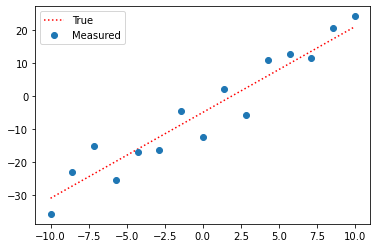

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, Ytrue, 'r:', label='True')
plt.plot(X, Ymeas, 'o', label='Measured')
plt.legend(loc=0)

### Setting up a model:

First, we need to define a function to be minimized (this is why we solve an *optimization* problem!).

We will write a function that calculates the *residuals* of our model, 

In [5]:
#  Define a model of a straight line:
def line_residuals(params, x, data = None, eps_data = None):
    '''
    We define a function that also returns the model only if no data is passed.
    '''
    m = params['slope']
    n = params['zpt']
    
    model = m * x + n
    
    if data is not None:
        diff = data - model
        if eps_data is not None:
            return diff / eps_data
        return diff
    
    return model



### The `Parameters` class

As mentioned above, lmfit works with parameters that are easy to modify, fix, constrain, etc. This is achivede with the `Parameters` class.

We will create the Parameters for our example:

In [6]:
params_line = lm.Parameters()
params_line.add('slope', value=1) # In their simplest form, we need the name of the parameter and its initial value (guess)
params_line.add('zpt', value=-0.5)


Check what information is stored for each parameter:

In [7]:
params_line

name,value,initial value,min,max,vary
slope,1.00000000,1,-inf,inf,True
zpt,-0.50000000,-0.5,-inf,inf,True


You can see that a minimum, maximum and vary arguments also exist. These three can also be set by the user at creation time.

### Minimizing (fitting) the model:

In [8]:
results_line = lm.minimize( line_residuals, params_line, args=(X, Ymeas))

In [9]:
results_line

We can check that the routine in fact converged:

In [10]:
results_line.success, results_line.aborted

(True, False)

In [11]:
results_line.message

'One or more variable did not affect the fit.'

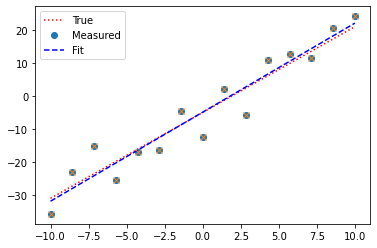

In [12]:
line_eval = line_residuals( results_line.params, X)

plt.clf()
plt.plot(X, Ytrue, 'r:', label='True')
plt.plot(X, Ymeas, 'o', label='Measured')
plt.plot(X, line_eval, 'b--', label='Fit')
plt.legend(loc=0)
plt.plot(X, line_eval+results_line.residual, 'x') # Evaluation + residuals equals to data.

In [13]:
# We can access the parameter estimated value:
results_line.params['slope'].value, results_line.params['zpt'].value

(2.6983711071497165, -4.904131029820327)

In [14]:
# We can also access the calculated 1-sigma error:
results_line.params['slope'].stderr, results_line.params['zpt'].stderr

(0.22011674232758593, 1.3585900171135454)

### Parameter constraints and fixing parameters:

It is possible to constraint parameters by passing the `min` and/or `max` arguments.

In addition, one can fix a parameter to its initial value by doing setting `vary=False`. 

In [15]:
params_line_fixed = lm.Parameters()
params_line_fixed.add('slope', value=0.1)  # In their simplest form, we need the name of the parameter and its initial value (guess)
params_line_fixed.add('zpt', value=1, vary=False) # Set zpt=1

In [16]:
results_line_fixed = lm.minimize( line_residuals, params_line_fixed, args=(X, Ymeas))
results_line_fixed

In [17]:
line_eval_fixed = line_residuals( results_line_fixed.params, X)


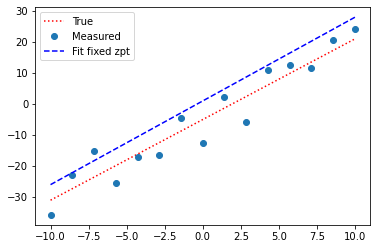

In [18]:
plt.clf()
plt.plot(X, Ytrue, 'r:', label='True')
plt.plot(X, Ymeas, 'o', label='Measured')
plt.plot(X, line_eval_fixed, 'b--', label='Fit fixed zpt')
plt.legend(loc=0)

Similarly, we can set parameter constraints using the `min` and/or `max` arguments:

In [19]:
params_line_cons = lm.Parameters()
params_line_cons.add('slope', value=0.1)  # In their simplest form, we need the name of the parameter and its initial value (guess)
params_line_cons.add('zpt', value=1, min=-8, max=-5.5) # Set zpt=1

In [20]:
results_line_cons = lm.minimize( line_residuals, params_line_cons, args=(X, Ymeas))
results_line_cons

In [21]:
line_eval_cons = line_residuals( results_line_cons.params, X)


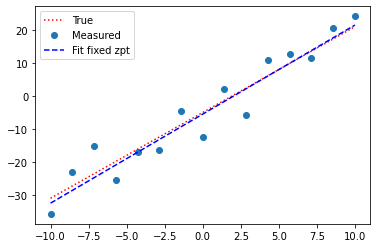

In [22]:
plt.clf()
plt.plot(X, Ytrue, 'r:', label='True')
plt.plot(X, Ymeas, 'o', label='Measured')
plt.plot(X, line_eval_cons, 'b--', label='Fit fixed zpt')
plt.legend(loc=0)

It is important to mention that you can add parameters in two other ways. Check the documentation:

https://lmfit.github.io/lmfit-py/parameters.html#the-parameters-class

## The Model class

At some point, LMFIT incorporated the `Model` class that allows you to interact in an easier way with you function to be minimized:

In [23]:
# Define the function to evaluate in the model:
def parabola(x,a,b,c):
    return a*x**2 + b*x + c

In [24]:
parab_model = lm.Model( parabola)

In [25]:
# The class also guesses the paramenters and independent variables:
print('parameter names: {}'.format(parab_model.param_names))
print('independent variables: {}'.format(parab_model.independent_vars))

parameter names: ['a', 'b', 'c']
independent variables: ['x']


In [26]:
Ypar_true = parabola(X, 0.65, -4.4, 10.2)

In [27]:
parab_params = parab_model.make_params( a=1, b=1, c=1)
parab_params

name,value,initial value,min,max,vary
a,1.00000000,None,-inf,inf,True
b,1.00000000,None,-inf,inf,True
c,1.00000000,None,-inf,inf,True


In [28]:
Ypar_guess = parab_model.eval(parab_params, x=X)

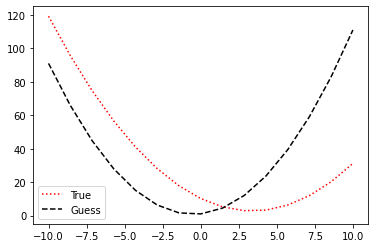

In [29]:
plt.clf()
plt.plot(X, Ypar_true, 'r:', label='True')
plt.plot(X, Ypar_guess, 'k--', label='Guess')
plt.legend(loc=0)

In [30]:
# Create some mock data:
Ypar_meas = Ypar_true + 8*np.random.randn(len(X))

In [31]:
results_parab = parab_model.fit(Ypar_meas, parab_params, x=X)
results_parab

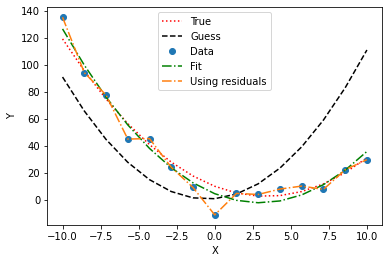

In [32]:
plt.clf()
plt.plot(X, Ypar_true, 'r:', label='True')
plt.plot(X, results_parab.init_fit, 'k--', label='Guess') # See how the initial params are evaluated?
plt.plot(X, Ypar_meas, 'o', label='Data')
plt.plot(X, results_parab.eval(), 'g-.', label='Fit') # See how we can evaluate the model?
plt.plot(X, results_parab.eval() - results_parab.residual, '-.', label='Using residuals') # See how we can recover the data points?
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("Y");

## Built-in models and Composite models


LMFIT includes some common models that are used in multiple disciplines. We will first solve the previous optimization problem using the built-in model, and after we will introduce a composite model with an example (from LMFIT documentation) which is pertinent to astronomy: 

In [33]:
# We first create an instance of the LinearModel:
parab_builtin = lm.models.ParabolicModel()


In [34]:
parab_params_builtin = parab_builtin.make_params()
parab_params_builtin

name,value,initial value,min,max,vary
c,0.00000000,None,-inf,inf,True
b,0.00000000,None,-inf,inf,True
a,0.00000000,None,-inf,inf,True


In [35]:
# Some built-in models include the "guess" parameters function!
par_guess_builtin = parab_builtin.guess(X, Ypar_meas)
par_guess_builtin

name,value,initial value,min,max,vary
c,3.77436030,None,-inf,inf,True
b,-0.10492006,None,-inf,inf,True
a,-8.3070e-05,None,-inf,inf,True


In [36]:
results_parab_builtin = parab_builtin.fit(  Ypar_meas, par_guess_builtin, x=X)

In [37]:
results_parab_builtin

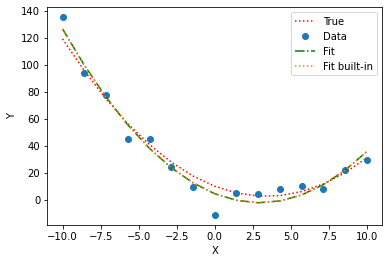

In [38]:
plt.clf()
plt.plot(X, Ypar_true, 'r:', label='True')
plt.plot(X, Ypar_meas, 'o', label='Data')
plt.plot(X, results_parab.eval(), 'g-.', label='Fit') # See how we can evaluate the model?
plt.plot(X, results_parab_builtin.eval(), ':', label='Fit built-in') # See how we can recover the data points?
plt.legend(loc=0)
plt.xlabel("X")
plt.ylabel("Y");

## Working with composite models:

In [39]:
# Import models to be used to compose a final model"

peak = lm.models.GaussianModel()
background = lm.models.LinearModel()

model = peak + background # Define a model as a combination

In [40]:
model.param_names

['sigma', 'center', 'amplitude', 'intercept', 'slope']

In [55]:
Xm = np.linspace(-20,20,50)
m_params = lm.Parameters()
for p,v in zip( model.param_names, [2.5,-3, 20, 6, 0.1]):
    m_params.add( p, value=v)

Ym_true = model.eval( m_params, x=Xm)
Ym_meas = Ym_true + 0.1*np.random.randn(len(Ym_true))

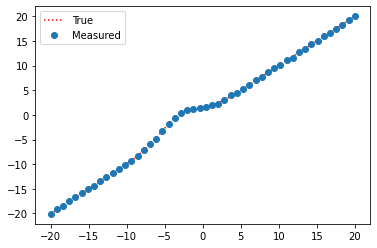

In [56]:
plt.plot(Xm, Ym_true, 'r:', label='True')
plt.plot(Xm, Ym_meas, 'o', label='Measured')
plt.legend(loc=0)

In [57]:
#m_pars1 = peak.make_params()
m_guess = background.guess(Xm, Ym_meas)
m_guess

name,value,initial value,min,max,vary
intercept,-0.49965501,None,-inf,inf,True
slope,1.00442091,None,-inf,inf,True


In [58]:
m_guess += peak.guess( Xm, Ym_true)

In [59]:
m_guess

name,value,initial value,min,max,vary,expression
intercept,-0.49965501,None,-inf,inf,True,
slope,1.00442091,None,-inf,inf,True,
sigma,9.16582692,None,0.00000000,inf,True,
center,10.3158304,None,-inf,inf,True,
amplitude,1099.89923,None,-inf,inf,True,
fwhm,21.5838726,None,-inf,inf,False,2.3548200*sigma
height,47.8730760,None,-inf,inf,False,"0.3989423*amplitude/max(1.e-15, sigma)"


In [60]:
m_guess['amplitude'].set(value = 10, min=0.)
m_guess['sigma'].set(value = 2)
m_guess['intercept'].set(value = 1)
m_guess['center'].set(min=-10, max=10)
m_guess['slope'].set(min=-0.5, max=0.5)
m_guess

name,value,initial value,min,max,vary,expression
intercept,1.00000000,None,-inf,inf,True,
slope,0.50000000,None,-0.50000000,0.50000000,True,
sigma,2.00000000,None,0.00000000,inf,True,
center,10.0000000,None,-10.0000000,10.0000000,True,
amplitude,10.0000000,None,0.00000000,inf,True,
fwhm,4.70964000,None,-inf,inf,False,2.3548200*sigma
height,1.99471150,None,-inf,inf,False,"0.3989423*amplitude/max(1.e-15, sigma)"


In [61]:
model_results = model.fit( Ym_meas, m_guess, x=Xm)
model_results

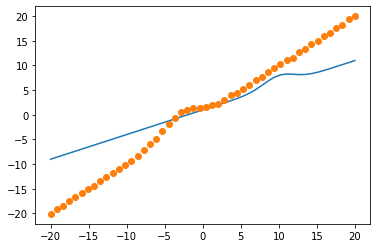

In [62]:
plt.plot(Xm,model_results.best_fit)
plt.plot(Xm,Ym_meas, 'o')